## Importing Dependencies

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', False)

sns.set()
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [118]:
company = pd.read_csv("companies.csv")

In [119]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


### Summary

In [120]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [121]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [122]:
company.dtypes

id                      object
Unnamed: 0.1             int64
entity_type             object
entity_id                int64
parent_id              float64
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width             float64
logo_height            float64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds      float64
invested_companies     float64
first_funding_at        object
last_funding_at         object
funding_

In [123]:
company.shape

(196553, 44)

### Null Values in Dataset

In [124]:
company.isna().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

### There are many columns which is not usable and repetitive so we can drop them

In [125]:
# as they provide too much of granularity
company.drop(['region', 'city', 'state_code'], axis=1, inplace=True)

In [126]:
# as they are redundant.
company.drop(['id','Unnamed: 0.1','entity_type','entity_id',
              'parent_id','created_by','created_at','updated_at'], axis=1, inplace=True)

In [127]:
# as they are irrelevant features.
company.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 
              'logo_height', 'short_description', 'description', 'overview','tag_list', 
              'name','normalized_name', 'permalink', 'invested_companies'], axis=1, inplace=True)

In [128]:
company.shape

(196553, 19)

In [129]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Delete duplicate values if found any.

In [130]:
# Delete duplicate values if found any.
company.duplicated().any()

True

In [131]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
company.duplicated().sum()

87089

In [132]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)
company.shape

(109464, 19)

In [133]:
# check if any left
company.duplicated().any()

False

### Delete those which has more than 98% of null values.

In [134]:
(company.isna().mean()*100).sort_values()

status                  0.000000
category_code          11.172623
country_code           22.719798
founded_at             24.586165
lat                    25.910802
lng                    25.910802
relationships          31.428598
milestones             48.740225
last_milestone_at      48.740225
first_milestone_at     48.740225
funding_rounds         71.067200
last_funding_at        71.248995
first_funding_at       71.248995
funding_total_usd      74.546883
closed_at              97.607433
investment_rounds      97.943616
last_investment_at     97.947270
first_investment_at    97.947270
ROI                    99.336768
dtype: float64

#### ROI column more than 98% null value 

### Droping Columns Having Highest Null Values(more than 96%)

In [135]:
company.drop(['first_investment_at', 'last_investment_at', 'investment_rounds', 'ROI'], axis=1, inplace=True)
company.shape

(109464, 15)

In [136]:
company.drop(['first_funding_at','last_funding_at',
              'first_milestone_at','last_milestone_at'], axis=1, inplace=True)
company.shape

(109464, 11)

### Droping  Raws Having Null values in 'category_code', 'status', 'country_code'& 'founded_at'

In [137]:
company.isna().sum()

category_code         12230
status                    0
founded_at            26913
closed_at            106845
country_code          24870
funding_rounds        77793
funding_total_usd     81602
milestones            53353
relationships         34403
lat                   28363
lng                   28363
dtype: int64

In [138]:
company.dropna(subset=['status', 'country_code', 'category_code', 'founded_at'], inplace=True)

In [139]:
company.shape

(63585, 11)

In [140]:
# Since we can see only nan values so et's check how much of rows has nan values.
company.isna().sum()

category_code            0
status                   0
founded_at               0
closed_at            61924
country_code             0
funding_rounds       40696
funding_total_usd    43118
milestones           28341
relationships        15290
lat                   2374
lng                   2374
dtype: int64

In [141]:
company.head()

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851


## Delete outliers for 'funding_total_usd' , 'funding_rounds' and 'relationships'.

### Summary:
    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. plots after trimming 


### Checking Outliers 

<AxesSubplot:title={'center':'relationships'}, xlabel='relationships', ylabel='Density'>

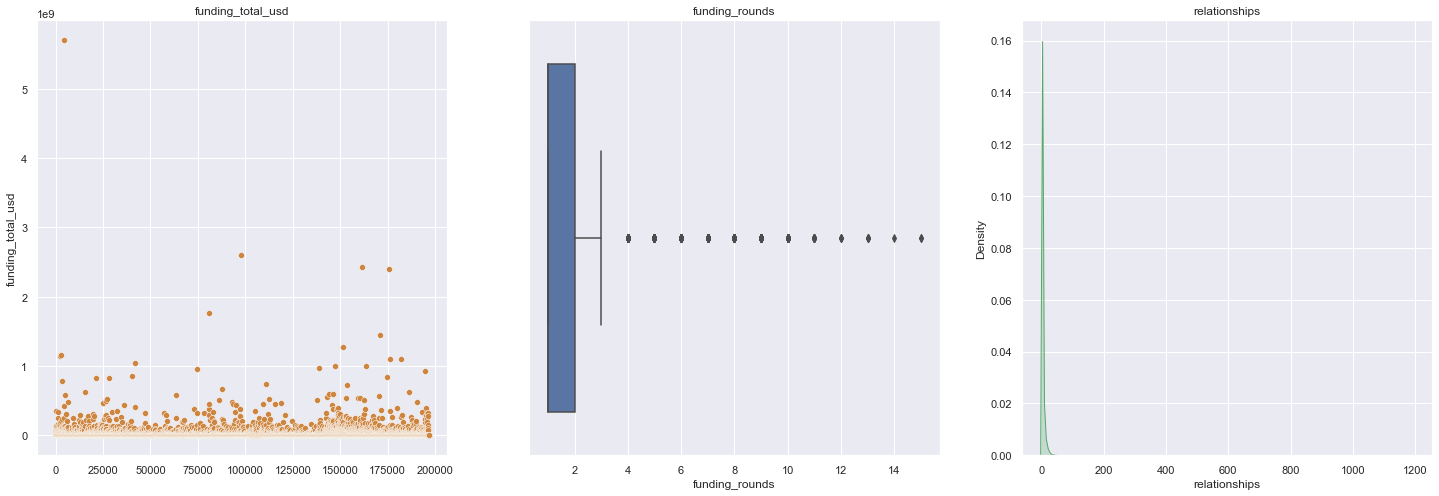

In [142]:
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
plt.title('funding_total_usd')
sns.scatterplot(x=company['funding_total_usd'].index,y=company['funding_total_usd'],color='peru')

plt.subplot(1,3,2)
plt.title('funding_rounds')
sns.boxplot(x=company.funding_rounds)

plt.subplot(1,3,3)
plt.title('relationships')
sns.kdeplot(x=company['relationships'],fill=True,color='g')

### Find the IQR

In [143]:
# For funding_total_usd
Q1_usd = company.funding_total_usd.quantile(0.25)
Q3_usd = company.funding_total_usd.quantile(0.75)
print(f'Q1_usd : {Q1_usd}')
print(f'Q3_usd : {Q3_usd}')
IQR_usd = Q3_usd - Q1_usd
print(f'IQR_usd : {IQR_usd}\n')


# For funding_rounds
#Type your code here!
Q1_rounds = company.funding_rounds.quantile(0.25)
Q3_rounds = company.funding_rounds.quantile(0.75)
print(f'Q1_rounds : {Q1_rounds}')
print(f'Q3_rounds : {Q3_rounds}')
IQR_rounds = Q3_rounds - Q1_rounds
print(f'IQR_rounds : {IQR_rounds}\n')

#  For relationships
#Type your code here!
Q1_relationship = company.relationships.quantile(0.25)
Q3_relationship = company.relationships.quantile(0.75)
print(f'Q1_relationship : {Q1_relationship}')
print(f'Q3_relationship : {Q3_relationship}')
IQR_relationship = Q3_relationship - Q1_relationship
print(f'IQR_relationship : {IQR_relationship}')

Q1_usd : 511038.0
Q3_usd : 12000000.0
IQR_usd : 11488962.0

Q1_rounds : 1.0
Q3_rounds : 2.0
IQR_rounds : 1.0

Q1_relationship : 1.0
Q3_relationship : 4.0
IQR_relationship : 3.0


### Find the Upper and Lower limit

In [144]:
# For funding_total_usd
lower_limit_usd = Q1_usd - 1.5*IQR_usd
upper_limit_usd = Q3_usd + 1.5*IQR_usd
print(f'lower_limit_usd : {lower_limit_usd}')
print(f'upper_limit_usd : {upper_limit_usd}\n')

# For funding_rounds
lower_limit_rounds = Q1_rounds - 1.5*IQR_rounds
upper_limit_rounds = Q3_rounds + 1.5*IQR_rounds
print(f'lower_limit_rounds :{lower_limit_rounds}') 
print(f'upper_limit_rounds : {upper_limit_rounds}\n')

# For relationship
lower_limit_relationship = Q1_relationship - 1.5*IQR_relationship
upper_limit_relationship = Q3_relationship + 1.5*IQR_relationship
print(f'lower_limit_relationship :{lower_limit_relationship}') 
print(f'upper_limit_relationship : {upper_limit_relationship}')

lower_limit_usd : -16722405.0
upper_limit_usd : 29233443.0

lower_limit_rounds :-0.5
upper_limit_rounds : 3.5

lower_limit_relationship :-3.5
upper_limit_relationship : 8.5


### Find outliers

In [145]:
# For funding_total_usd
print(f'funding_total_usd outliers :{(company[(company.funding_total_usd<lower_limit_usd)|(company.funding_total_usd>upper_limit_usd)]).shape}')

# For funding_rounds
print(f'funding_rounds outliers : {(company[(company.funding_rounds<lower_limit_rounds)|(company.funding_rounds>upper_limit_rounds)]).shape}')

# For relationship
print(f'relationship outliers : {(company[(company.relationships<lower_limit_relationship)|(company.relationships>upper_limit_relationship)]).shape}')

funding_total_usd outliers :(2561, 11)
funding_rounds outliers : (2182, 11)
relationship outliers : (5189, 11)


### Drop the outliers

In [146]:
company.shape

(63585, 11)

In [147]:
# for funding_total_usd
filter1 = company['funding_total_usd'] > upper_limit_usd
filter2 = company['funding_total_usd'] < lower_limit_usd 
company.drop(company [filter1 | filter2].index, inplace=True)
company.shape

(61024, 11)

In [148]:
# For funding rounds

filter3 = company['funding_rounds'] > upper_limit_rounds 
filter4 = company['funding_rounds'] < lower_limit_rounds 
company.drop(company [filter3 | filter4].index, inplace=True)
company.shape

(59987, 11)

In [149]:
# For funding rounds

filter5 = company['relationships'] > upper_limit_relationship
filter6 = company['relationships'] < lower_limit_relationship
company.drop(company [filter5 | filter6].index, inplace=True)
company.shape

(56580, 11)

In [150]:
company.shape

(56580, 11)

<AxesSubplot:title={'center':'relationships'}, xlabel='relationships', ylabel='Density'>

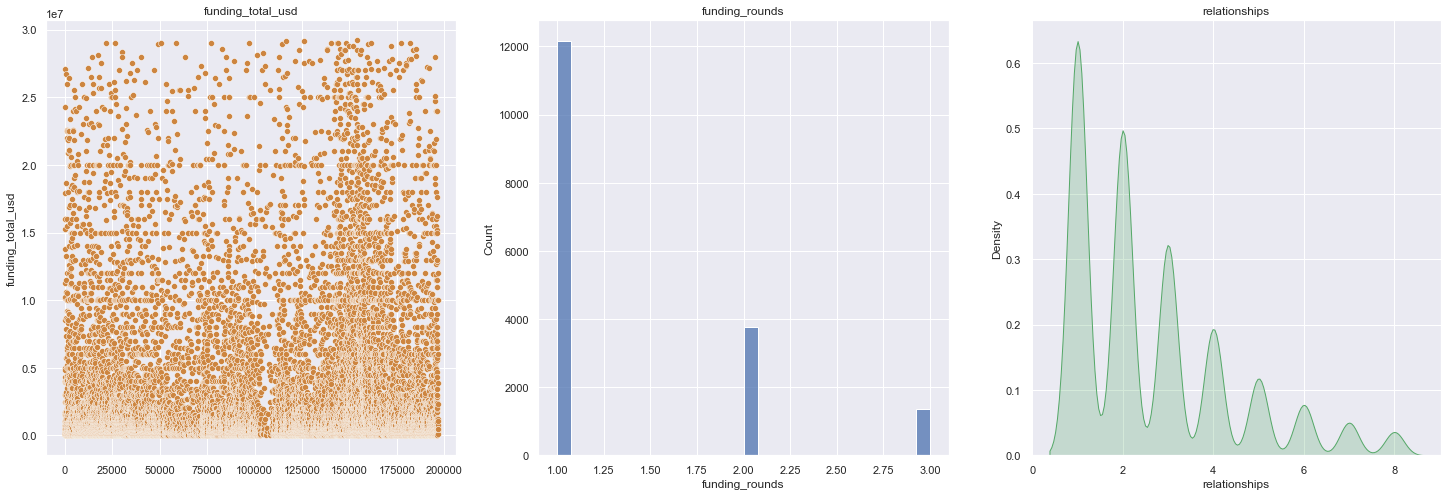

In [151]:
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
plt.title('funding_total_usd')
sns.scatterplot(x=company['funding_total_usd'].index,y=company['funding_total_usd'],color='peru')

plt.subplot(1,3,2)
plt.title('funding_rounds')
sns.histplot(x=company.funding_rounds)


plt.subplot(1,3,3)
plt.title('relationships')
sns.kdeplot(x=company['relationships'],fill=True,color='g')

## Now Extrcating Year from Dates

### Convert founded_at, closed_at to years.

In [152]:
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng'],
      dtype='object')

In [153]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

company.head()

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
20,cleantech,operating,2003,NaN,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061


In [154]:
company.shape

(56580, 11)

### Creating New Feature for isClosed

#### Replacing 0 with 'Closed' & 'Acquired'  and 1 with 'Operating' & 'IPO'

In [155]:
company.status.value_counts()

operating    51951
acquired      2938
closed        1473
ipo            218
Name: status, dtype: int64

In [156]:
company['isClosed']=company['status'].replace({'operating':1, 'ipo':1,
                                               'acquired':0, 'closed':0})

In [157]:
company.isClosed.value_counts()

1    52169
0     4411
Name: isClosed, dtype: int64

#### Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.


In [158]:
company.closed_at.unique()

array([  nan, 2010., 2012., 2013., 2009., 2011., 2008., 2006., 1963.,
       1991., 2005., 2001., 2007., 1998., 2004., 1997., 2000.])

In [159]:
company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))

In [160]:
company.dropna(axis=0, subset=['closed_at'], inplace=True)

In [161]:
company.head()

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021.0,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,1
6,cleantech,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1
12,advertising,operating,2008,2021.0,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1
15,games_video,operating,2008,2021.0,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1
20,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1



### Getting Active Days Of Comapany

In [162]:
closed_at=company['closed_at']
founded_at=company['founded_at']

active_days=365*((closed_at).astype('float64')-(founded_at).astype('float64'))
company['Active_Days']=active_days
index_name=company['Active_Days'].sort_values().head(68).index
company.drop(index_name,inplace=True)
company['Active_Days']

5         5110.0
6         4745.0
12        4745.0
15        4745.0
20        6570.0
           ...  
196543    4745.0
196545    6205.0
196548    5110.0
196551    4745.0
196552    5110.0
Name: Active_Days, Length: 53592, dtype: float64

In [163]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days
5,advertising,operating,2007,2021.0,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,1,5110.0
6,cleantech,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1,4745.0
12,advertising,operating,2008,2021.0,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1,4745.0
15,games_video,operating,2008,2021.0,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1,4745.0
20,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,2008,2021.0,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373,1,4745.0
196545,software,operating,2004,2021.0,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219,1,6205.0
196548,ecommerce,operating,2007,2021.0,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,1,5110.0
196551,search,operating,2008,2021.0,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,1,4745.0


## Dealing with Numerical Data

In [164]:
company.dtypes

category_code         object
status                object
founded_at             int64
closed_at            float64
country_code          object
funding_rounds       float64
funding_total_usd    float64
milestones           float64
relationships        float64
lat                  float64
lng                  float64
isClosed               int64
Active_Days          float64
dtype: object

In [165]:
company.isna().sum()

category_code            0
status                   0
founded_at               0
closed_at                0
country_code             0
funding_rounds       37519
funding_total_usd    39623
milestones           25966
relationships        14453
lat                   2182
lng                   2182
isClosed                 0
Active_Days              0
dtype: int64

### Filling null values in funding_rounds, funding_total_usd, milestones

### Remove the null vaues with the mean value in 'Numerical Data'

In [166]:
company['funding_rounds'].fillna(round(company['funding_rounds'].mean()),inplace=True)

company['funding_total_usd'].fillna(round(company['funding_total_usd'].mean()),inplace=True)

company['milestones'].fillna(round(company['milestones'].mean()),inplace=True)

In [167]:
company.isna().sum()

category_code            0
status                   0
founded_at               0
closed_at                0
country_code             0
funding_rounds           0
funding_total_usd        0
milestones               0
relationships        14453
lat                   2182
lng                   2182
isClosed                 0
Active_Days              0
dtype: int64

### Drop remaining all null vales

In [168]:
company.dropna(inplace=True)

In [169]:
company.shape

(37740, 13)

In [170]:
company.reset_index(inplace=True,drop=True)

In [171]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days
0,advertising,operating,2007,2021.0,MAR,1.0,3652913.0,1.0,2.0,30.427755,-9.598107,1,5110.0
1,advertising,operating,2008,2021.0,USA,1.0,3652913.0,1.0,2.0,35.686975,-105.937799,1,4745.0
2,games_video,operating,2008,2021.0,USA,1.0,3652913.0,1.0,3.0,33.078655,-116.601964,1,4745.0
3,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1,6570.0
4,software,operating,2011,2021.0,AUS,1.0,3652913.0,1.0,2.0,49.050438,-122.304470,1,3650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37735,games_video,closed,2006,2012.0,USA,2.0,1100000.0,2.0,4.0,37.774929,-122.419415,0,2190.0
37736,security,operating,2008,2021.0,USA,1.0,3652913.0,1.0,5.0,38.846224,-77.306373,1,4745.0
37737,ecommerce,operating,2007,2021.0,USA,1.0,3652913.0,2.0,5.0,37.774929,-122.419415,1,5110.0
37738,search,operating,2008,2021.0,USA,1.0,3652913.0,1.0,1.0,34.052234,-118.243685,1,4745.0


### Save clean file

In [172]:
company.to_csv('Final Dataset.csv',index=False)

## Univariate Analysis

#### checking count of status, funding_rounds, milestones columns.

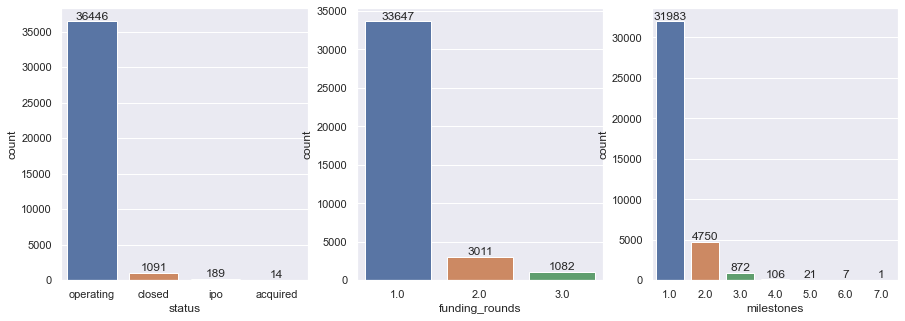

In [173]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax = sns.countplot(x=company['status'], order=company['status'].value_counts(ascending=False).index)
abs_values = company['status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

plt.subplot(1,3,2)
ax = sns.countplot(x=company['funding_rounds'], order=company['funding_rounds'].value_counts(ascending=False).index)
abs_values = company['funding_rounds'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

plt.subplot(1,3,3)
ax = sns.countplot(x=company['milestones'], order=company['milestones'].value_counts(ascending=False).index)
abs_values = company['milestones'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

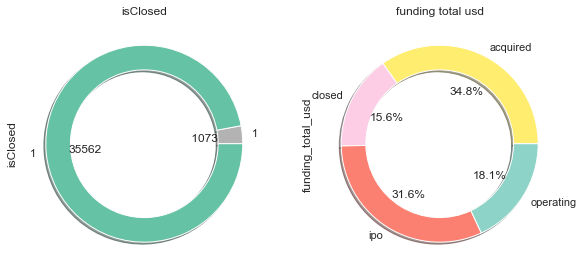

In [174]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("isClosed")
company.groupby('isClosed')['isClosed'].value_counts().plot(kind='pie', autopct=lambda p : '{:5.0f}'.format(p * (company['isClosed'].sum()) / 100), labels=company.isClosed, cmap='Set2_r',wedgeprops=dict(width=.25), shadow=True)

plt.subplot(1,3,2)
plt.title("funding total usd")
company.groupby('status')['funding_total_usd'].mean().plot(kind='pie', autopct='%1.1f%%', cmap='Set3_r',wedgeprops=dict(width=.25), shadow=True);

<AxesSubplot:title={'center':'Company Found Year'}, xlabel='closed_at', ylabel='Count'>

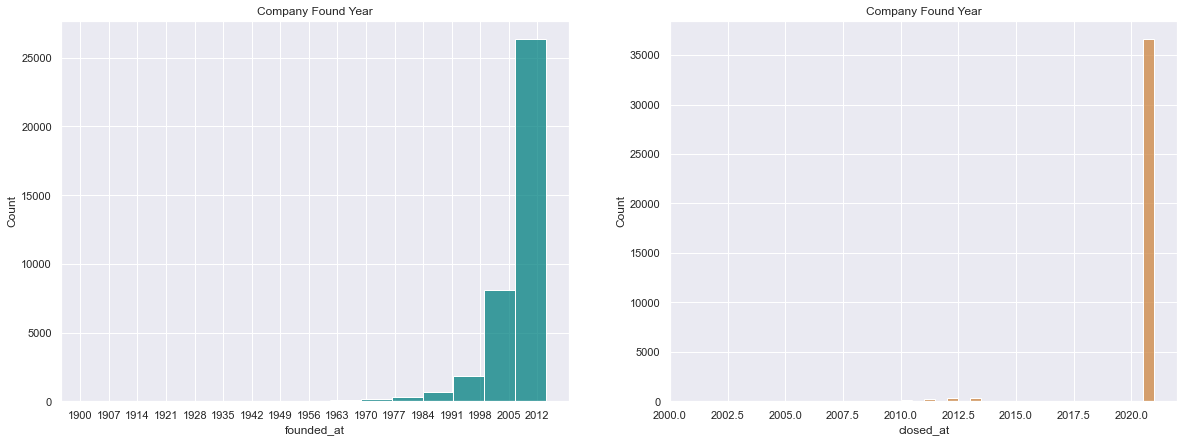

In [175]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title("Company Found Year")
sns.histplot(data=company,x=company['founded_at'],bins=15, color='teal')
plt.xticks(range(1900,2013,7));

plt.subplot(1,2,2)
plt.title("Company Found Year")
sns.histplot(data=company,x=company['closed_at'],bins=40,color='peru')

#### Most Companies Foundes Between Year of 2008 to 2012 and in First Month 

<AxesSubplot:xlabel='category_code'>

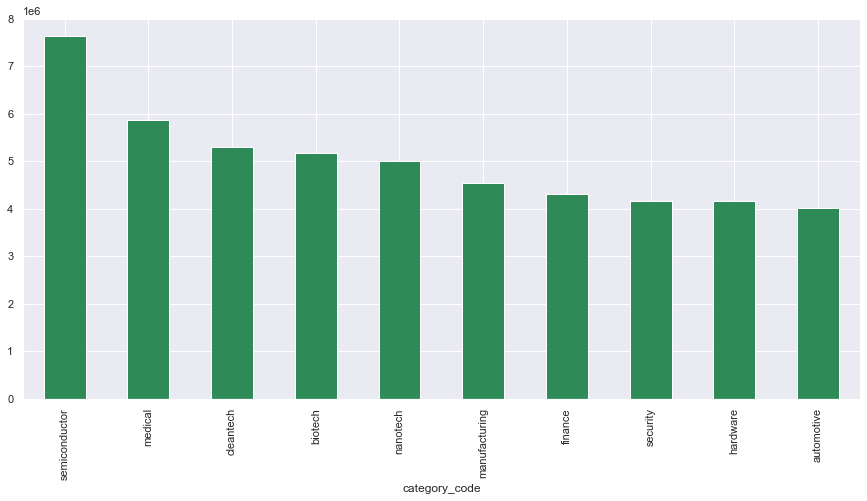

In [176]:
plt.figure(figsize=(15,7))
company.groupby('category_code')['funding_total_usd'].mean().nlargest(10).plot(kind='bar',color='seagreen')

#### Highest funding is in USA then Great Britain and third is Canada

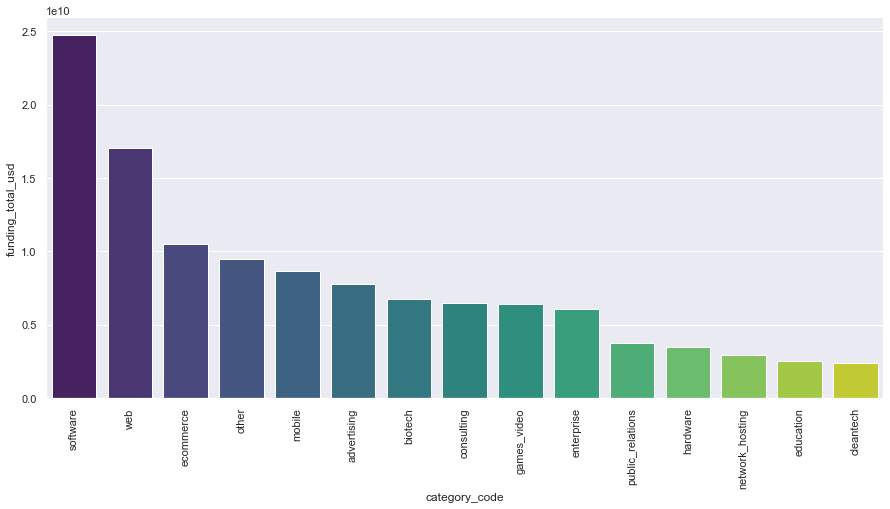

In [177]:
plt.figure(figsize=(15,7))
df_catfund=pd.DataFrame(company.groupby('category_code')['funding_total_usd'].sum().nlargest(15))
df_catfund=df_catfund.reset_index()
sns.barplot(x='category_code', y='funding_total_usd', data=df_catfund, palette='viridis')
plt.xticks(rotation=90);

#### Highest funding is for "Softwares" then "Web"

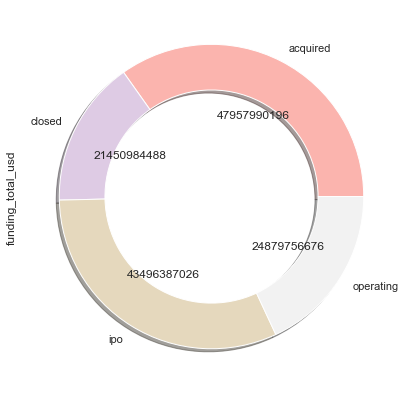

In [178]:
plt.figure(figsize=(15,7))

company.groupby('status')['funding_total_usd'].mean().plot(kind='pie',wedgeprops=dict(width=0.30),autopct=lambda p : '{:5.0f}'.format(p * (company['funding_total_usd'].sum()) / 100),shadow=True,cmap='Pastel1');

#### Acquired has Highest Average funding

<AxesSubplot:xlabel='milestones', ylabel='funding_total_usd'>

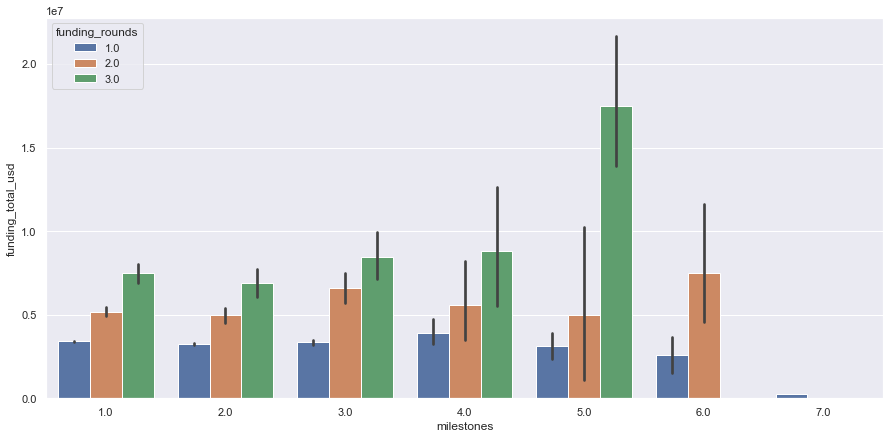

In [179]:
plt.figure(figsize=(15,7))
sns.barplot(hue=company.funding_rounds, y=company.funding_total_usd, x=company.milestones)

#### Companies with 5 milestones and 3 funding_round had Highet funding

<AxesSubplot:xlabel='status', ylabel='funding_total_usd'>

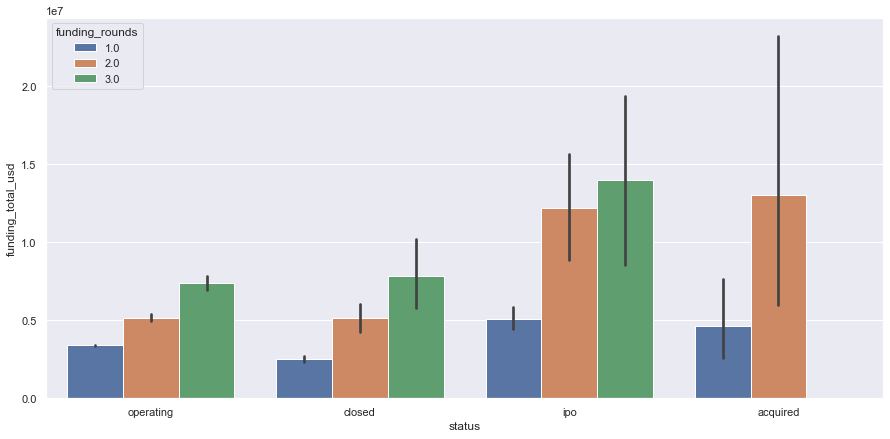

In [180]:
plt.figure(figsize=(15,7))
sns.barplot(hue=company.funding_rounds, y=company.funding_total_usd, x=company.status)

#### Companies are in IPO  Highet funding

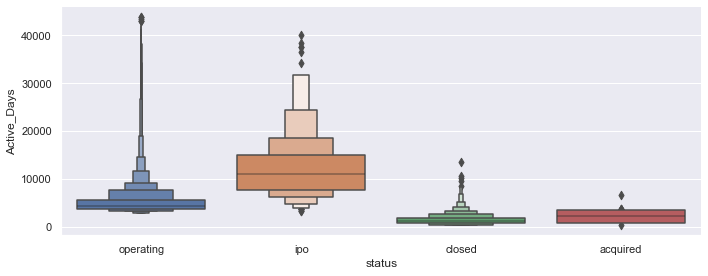

In [181]:
sns.catplot(y = "Active_Days", x = "status", data = company.sort_values("Active_Days", ascending = False), kind="boxen", height = 4, aspect = 2.5)

<AxesSubplot:>

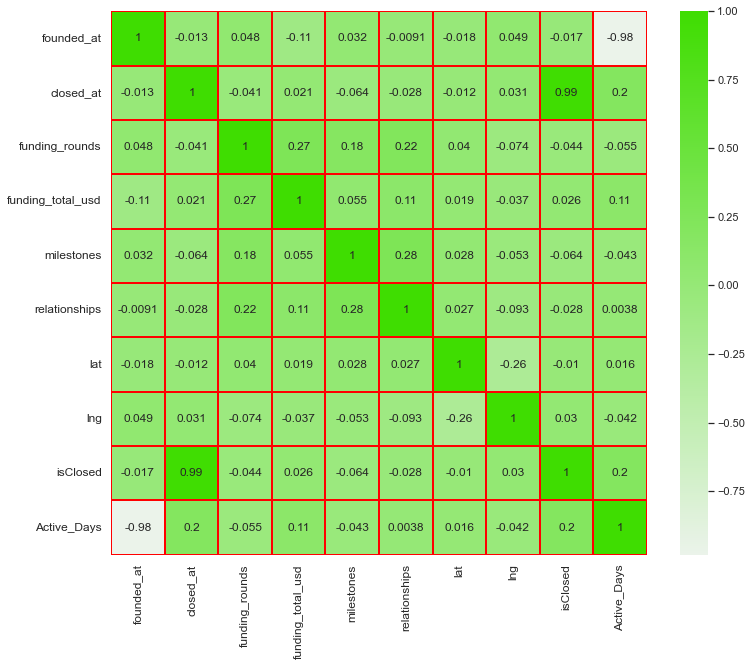

In [182]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cmap = sns.light_palette('#3fdd01',as_cmap=True)
sns.heatmap(company.corr(),annot=True, cmap=cmap, linewidths=2, linecolor='red')

#### Graph Shows Correaltion between Each Columns

## Categorical Data Encoding

In [183]:
company.head()

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days
0,advertising,operating,2007,2021.0,MAR,1.0,3652913.0,1.0,2.0,30.427755,-9.598107,1,5110.0
1,advertising,operating,2008,2021.0,USA,1.0,3652913.0,1.0,2.0,35.686975,-105.937799,1,4745.0
2,games_video,operating,2008,2021.0,USA,1.0,3652913.0,1.0,3.0,33.078655,-116.601964,1,4745.0
3,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1,6570.0
4,software,operating,2011,2021.0,AUS,1.0,3652913.0,1.0,2.0,49.050438,-122.304470,1,3650.0


In [184]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder

In [185]:
a=(pd.DataFrame(company['category_code'].value_counts()[15:].reset_index())['index'].to_list())
catcode=company['category_code'].replace(a,'other')
catcode=pd.get_dummies(catcode,prefix='Category')
catcode

,Category_advertising,Category_biotech,Category_consulting,Category_ecommerce,Category_education,Category_enterprise,Category_games_video,Category_hardware,Category_mobile,Category_network_hosting,Category_other,Category_public_relations,Category_search,Category_software,Category_web
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37736,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
37737,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
37738,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [186]:
b=(pd.DataFrame(company['country_code'].value_counts()[10:].reset_index())['index'].to_list())
countrycode=company['country_code'].replace(b,'other')
countrycode=pd.get_dummies(countrycode,prefix='Country')
countrycode

,Country_AUS,Country_CAN,Country_DEU,Country_ESP,Country_FRA,Country_GBR,Country_IND,Country_ISR,Country_NLD,Country_USA,Country_other
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37735,0,0,0,0,0,0,0,0,0,1,0
37736,0,0,0,0,0,0,0,0,0,1,0
37737,0,0,0,0,0,0,0,0,0,1,0
37738,0,0,0,0,0,0,0,0,0,1,0


In [187]:
company=pd.concat([company,catcode,countrycode],axis=1)
company=company.drop(['category_code','country_code'],axis=1)
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days,Category_advertising,Category_biotech,Category_consulting,Category_ecommerce,Category_education,Category_enterprise,Category_games_video,Category_hardware,Category_mobile,Category_network_hosting,Category_other,Category_public_relations,Category_search,Category_software,Category_web,Country_AUS,Country_CAN,Country_DEU,Country_ESP,Country_FRA,Country_GBR,Country_IND,Country_ISR,Country_NLD,Country_USA,Country_other
0,operating,2007,2021.0,1.0,3652913.0,1.0,2.0,30.427755,-9.598107,1,5110.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,operating,2008,2021.0,1.0,3652913.0,1.0,2.0,35.686975,-105.937799,1,4745.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,operating,2008,2021.0,1.0,3652913.0,1.0,3.0,33.078655,-116.601964,1,4745.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,operating,2003,2021.0,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1,6570.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,operating,2011,2021.0,1.0,3652913.0,1.0,2.0,49.050438,-122.304470,1,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37735,closed,2006,2012.0,2.0,1100000.0,2.0,4.0,37.774929,-122.419415,0,2190.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37736,operating,2008,2021.0,1.0,3652913.0,1.0,5.0,38.846224,-77.306373,1,4745.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37737,operating,2007,2021.0,1.0,3652913.0,2.0,5.0,37.774929,-122.419415,1,5110.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37738,operating,2008,2021.0,1.0,3652913.0,1.0,1.0,34.052234,-118.243685,1,4745.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [188]:
company=company.drop('status',axis=1)

<AxesSubplot:>

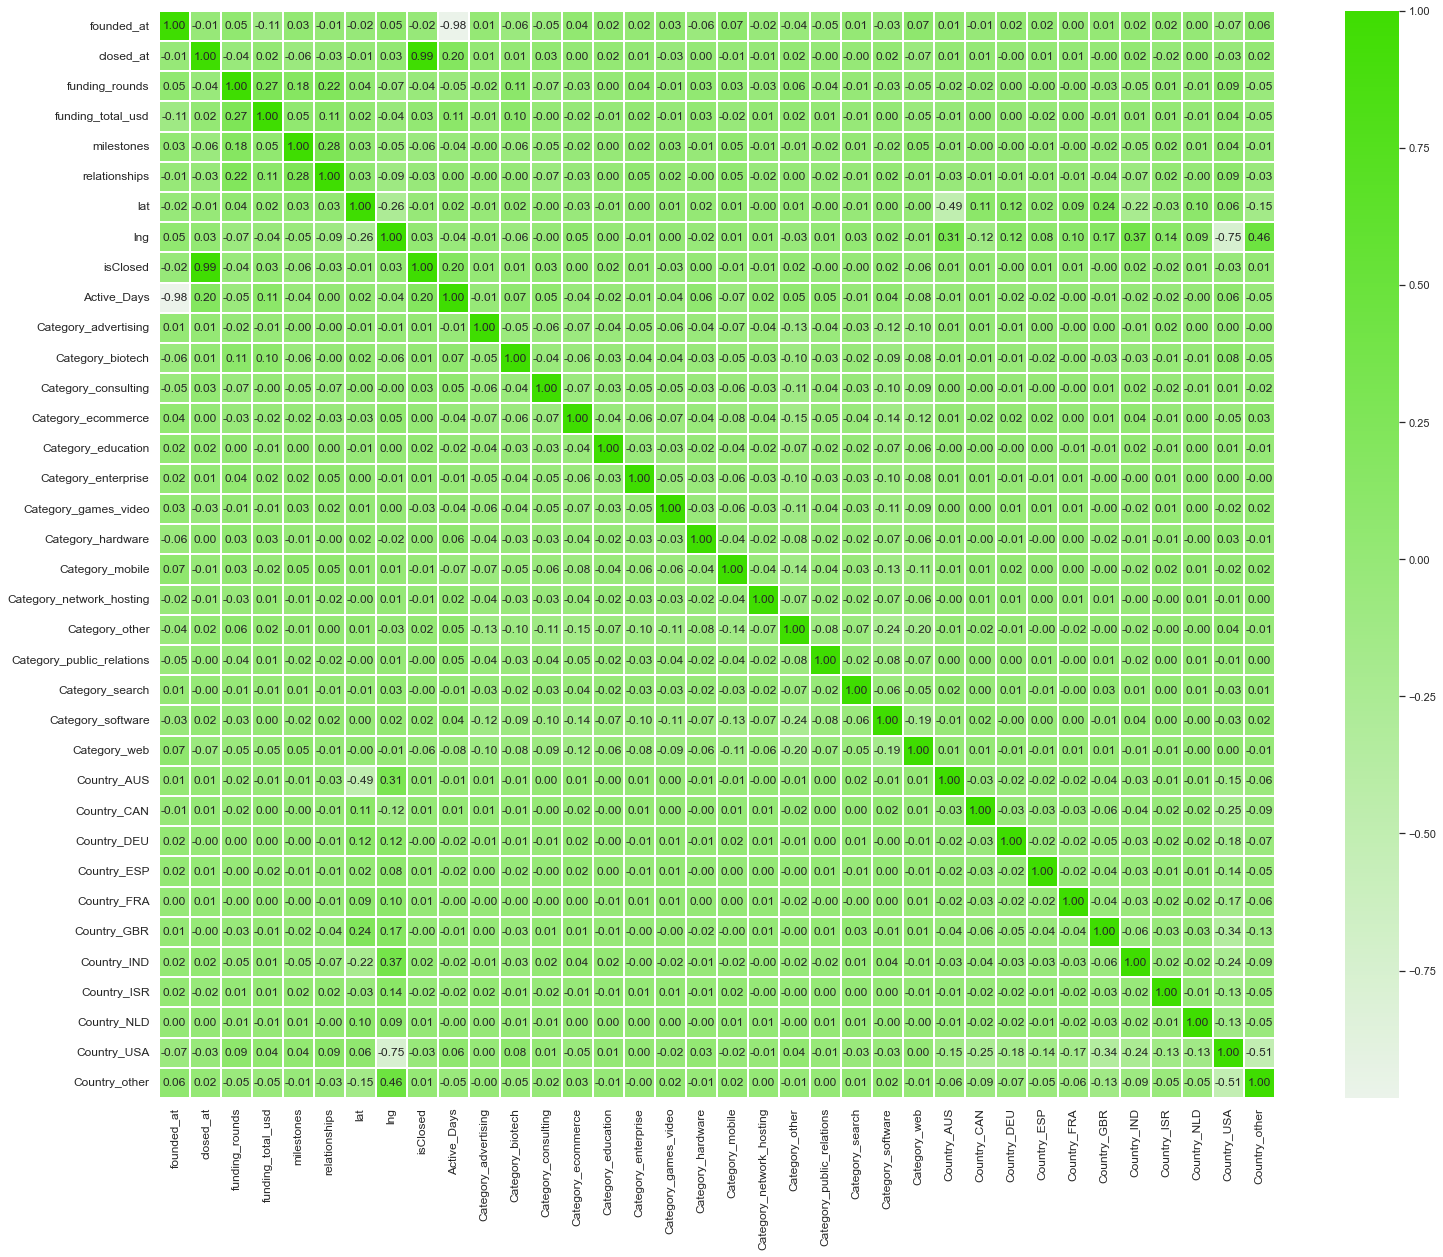

In [189]:
plt.figure(figsize=(25,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cmap = sns.light_palette('#3fdd01',as_cmap=True)
sns.heatmap(company.corr(),annot=True, cmap=cmap, linewidths=2,fmt='.2f', linecolor='white')

## Scaling of Data

In [190]:
roscaler=RobustScaler()

In [191]:
company[['funding_rounds','funding_total_usd','milestones','relationships','lat','lng','Active_Days']]=company[['funding_rounds','funding_total_usd','milestones','relationships','lat'
                         ,'lng','Active_Days']].astype('float64')

In [192]:
company[['funding_rounds','funding_total_usd','milestones','relationships','lat','lng','Active_Days']]=roscaler.fit_transform(company[['funding_rounds','funding_total_usd','milestones'
        ,'relationships','lat','lng','Active_Days']])

In [193]:
company.head()

,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days,Category_advertising,Category_biotech,Category_consulting,Category_ecommerce,Category_education,Category_enterprise,Category_games_video,Category_hardware,Category_mobile,Category_network_hosting,Category_other,Category_public_relations,Category_search,Category_software,Category_web,Country_AUS,Country_CAN,Country_DEU,Country_ESP,Country_FRA,Country_GBR,Country_IND,Country_ISR,Country_NLD,Country_USA,Country_other
0,2007,2021.0,0.0,0.0,0.0,0.0,-0.830224,0.578913,1,0.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2008,2021.0,0.0,0.0,0.0,0.0,-0.370881,-0.267420,1,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008,2021.0,0.0,0.0,0.0,0.5,-0.598693,-0.361104,1,0.2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2003,2021.0,2.0,6472380.0,0.0,2.0,-0.844251,-0.195430,1,1.2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2011,2021.0,0.0,0.0,0.0,0.0,0.796289,-0.411199,1,-0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [194]:
features=company.drop('isClosed',axis=1)
target=company['isClosed']

### Checking on Algorithm before Selecting Important Features 

## RandomForestClassifier

In [195]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=10)
from sklearn.ensemble import RandomForestClassifier
RF_Model=RandomForestClassifier(n_estimators=100)
RF_Model.fit(features_train,target_train)
predicted=RF_Model.predict(features_test)
print(f"Training Accuracy :{RF_Model.score(features_train,target_train)}")
print(f"Testing Accuracy :{RF_Model.score(features_test,target_test)}")

Training Accuracy :1.0
Testing Accuracy :1.0


In [196]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(target_test,predicted)

array([[ 226,    0],
       [   0, 7322]], dtype=int64)

<AxesSubplot:>

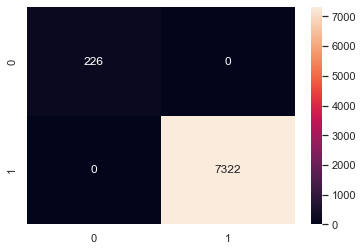

In [197]:
sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')

In [198]:
print(classification_report(target_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00      7322

    accuracy                           1.00      7548
   macro avg       1.00      1.00      1.00      7548
weighted avg       1.00      1.00      1.00      7548



In [199]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RF_Model,features_train, target_train, scoring='r2', cv=10)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## SVM

Training Accuracy :0.9708863275039745
Testing Accuracy :0.9700582935877053

confusion_matrix : [[   0  226]
 [   0 7322]]

classification_report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00       226
           1       0.97      1.00      0.98      7322

    accuracy                           0.97      7548
   macro avg       0.49      0.50      0.49      7548
weighted avg       0.94      0.97      0.96      7548




<AxesSubplot:>

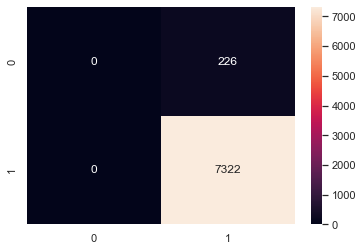

In [200]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=10)

from sklearn.svm import SVC 

svc_Model=SVC()

svc_Model.fit(features_train,target_train)
predicted=svc_Model.predict(features_test)

print(f"Training Accuracy :{svc_Model.score(features_train,target_train)}")
print(f"Testing Accuracy :{svc_Model.score(features_test,target_test)}\n")

print(f'confusion_matrix : {confusion_matrix(target_test,predicted)}\n')
print(f'classification_report : {classification_report(target_test,predicted)}\n')

sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')

## Random Forest Classifier 

###  Split in Train, Test and Validation

In [201]:
from sklearn.model_selection import train_test_split
features_main,features_test,target_main,target_test=train_test_split(features,target,test_size=0.2,random_state=10)
features_train,features_val,target_train,target_val=train_test_split(features_main,target_main,test_size=0.2,random_state=10)

from sklearn.ensemble import RandomForestClassifier
RF_Model=RandomForestClassifier(n_estimators=100)
RF_Model.fit(features_train,target_train)
predicted=RF_Model.predict(features_val)
print(f"Training Accuracy :{RF_Model.score(features_train,target_train)}")
print(f"Testing Accuracy :{RF_Model.score(features_test,target_test)}")
print(f"val Accuracy :{RF_Model.score(features_val,target_val)}")

Training Accuracy :1.0
Testing Accuracy :1.0
val Accuracy :1.0


In [202]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(target_val,predicted)

array([[ 167,    0],
       [   0, 5872]], dtype=int64)

In [203]:
print(classification_report(target_val,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00      5872

    accuracy                           1.00      6039
   macro avg       1.00      1.00      1.00      6039
weighted avg       1.00      1.00      1.00      6039



### CV

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [205]:
model = RandomForestClassifier(random_state=10)

In [206]:
score=cross_val_score(model, features_train, target_train, cv=15)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## SVM

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
features_main,features_test,target_main,target_test=train_test_split(features,target,test_size=0.2,random_state=10)
features_train,features_val,target_train,target_val=train_test_split(features_main,target_main,test_size=0.2,random_state=10)

from sklearn.svm import SVC 

svc_Model=SVC()

svc_Model.fit(features_train,target_train)
predicted=svc_Model.predict(features_test)

print(f"Training Accuracy :{svc_Model.score(features_train,target_train)}")
print(f"Testing Accuracy :{svc_Model.score(features_test,target_test)}")
print(f"val Accuracy :{svc_Model.score(features_val,target_val)}")

Training Accuracy :0.9705212602989277
Testing Accuracy :0.9700582935877053
val Accuracy :0.9723464149693658


##  LogisticRegression

In [208]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
lgmodel=LogisticRegression()
lgmodel.fit(features_train,target_train)
predicted=lgmodel.predict(features_test)
print(f"Training Accuracy :{lgmodel.score(features_train,target_train)}")
print(f"Testing Accuracy :{lgmodel.score(features_test,target_test)}")

Training Accuracy :0.9947668256491786
Testing Accuracy :0.9941706412294647


In [209]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(target_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       222
           1       0.99      1.00      1.00      7326

    accuracy                           0.99      7548
   macro avg       0.99      0.91      0.94      7548
weighted avg       0.99      0.99      0.99      7548



<AxesSubplot:>

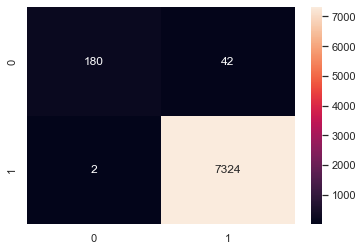

In [210]:
sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')

#### Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)

In [211]:
from imblearn.over_sampling import SMOTE
smot=SMOTE(sampling_strategy='minority')
features_smot, target_smot = smot.fit_resample(features, target)

In [212]:
features_smot.shape , target_smot.shape

((73270, 35), (73270,))

### Selcting Important Features with Over Sampling(SMOTE)

[0.0126795  0.58433435 0.00737389 0.01987127 0.00348768 0.00814265
 0.00204303 0.00386772 0.10407144 0.01503559 0.01177424 0.01591419
 0.01511337 0.00471063 0.01072922 0.00631792 0.00507901 0.01285402
 0.00369408 0.04548398 0.0063326  0.00287646 0.04107971 0.00802585
 0.0011158  0.00650099 0.00101679 0.00132629 0.00169765 0.00543512
 0.00600502 0.0006796  0.00081652 0.00585593 0.01865786]


,closed_at,Active_Days,Category_other,Category_software,funding_total_usd,Country_other,Category_consulting,Category_ecommerce,Category_advertising,Category_mobile,founded_at,Category_biotech,Category_enterprise,relationships,Category_web
0,2021.0,0.4,0,0,0.0,1,0,0,1,0,2007,0,0,0.0,0
1,2021.0,0.2,0,0,0.0,0,0,0,1,0,2008,0,0,0.0,0
2,2021.0,0.2,0,0,0.0,0,0,0,0,0,2008,0,0,0.5,0
3,2021.0,1.2,1,0,6472380.0,0,0,0,0,0,2003,0,0,2.0,0
4,2021.0,-0.4,0,1,0.0,0,0,0,0,0,2011,0,0,0.0,0


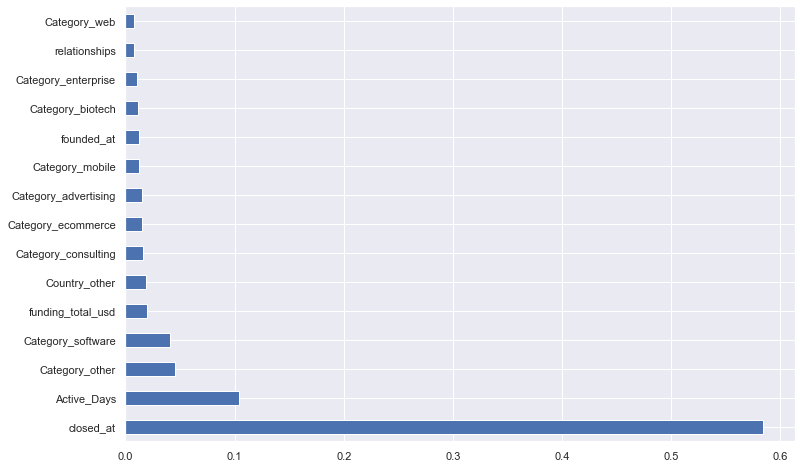

In [213]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features_smot,target_smot)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=features_smot.columns)

plt.figure(figsize=(12,8))
feat_importances.nlargest(15).plot(kind='barh')

important_features=pd.DataFrame(feat_importances.nlargest(15)).index
features_selected=features_smot[important_features]
features_selected.head()

In [214]:
features_selected.drop('closed_at',axis=1, inplace=True)
features_selected.head()

,Active_Days,Category_other,Category_software,funding_total_usd,Country_other,Category_consulting,Category_ecommerce,Category_advertising,Category_mobile,founded_at,Category_biotech,Category_enterprise,relationships,Category_web
0,0.4,0,0,0.0,1,0,0,1,0,2007,0,0,0.0,0
1,0.2,0,0,0.0,0,0,0,1,0,2008,0,0,0.0,0
2,0.2,0,0,0.0,0,0,0,0,0,2008,0,0,0.5,0
3,1.2,1,0,6472380.0,0,0,0,0,0,2003,0,0,2.0,0
4,-0.4,0,1,0.0,0,0,0,0,0,2011,0,0,0.0,0


### Checking on Algorithm After Selecting Important Features

Training Accuracy :1.0
Testing Accuracy :0.9997270369864883
val Accuracy :0.999931759246622
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      7253
           1       0.50      0.49      0.50      7401

    accuracy                           0.50     14654
   macro avg       0.50      0.50      0.50     14654
weighted avg       0.50      0.50      0.50     14654



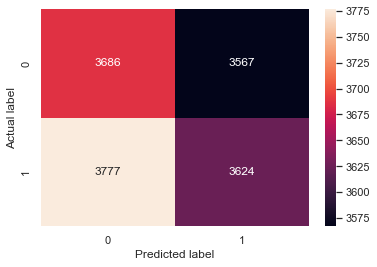

In [215]:
from sklearn.model_selection import train_test_split
features_main,features_test,target_main,target_test=train_test_split(features_selected,target_smot,test_size=0.2,random_state=1)
features_train,features_val,target_train,target_val=train_test_split(features_main,target_main,test_size=0.25,random_state=1)

from sklearn.ensemble import RandomForestClassifier
RF_Model=RandomForestClassifier(n_estimators=100)
RF_Model.fit(features_train,target_train)
predicted=RF_Model.predict(features_val)

print(f"Training Accuracy :{RF_Model.score(features_train,target_train)}")
print(f"Testing Accuracy :{RF_Model.score(features_test,target_test)}")
print(f"val Accuracy :{RF_Model.score(features_val,target_val)}")
print(classification_report(target_test,predicted))

sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## HyperParameter Tuning

In [216]:
rf=RandomForestClassifier()

In [217]:
from sklearn.model_selection import RandomizedSearchCV

In [218]:
random_state=[x for x in range(1,51)]
n_estimators = [x for x in range(100,1201,100)]
max_features = ['auto', 'sqrt']
max_depth = [x for x in range(5,31,5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [219]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state':random_state
              }

In [220]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error')

In [221]:
rf_random.fit(features_train,target_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='neg_mean_squared_error')

In [222]:
rf_random.best_params_

{'random_state': 37,
 'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [224]:
rf_new=RandomForestClassifier(n_estimators=200,random_state=37,min_samples_split=15,
                              min_samples_leaf=2,max_features='auto',max_depth=25)

In [225]:
rf_new.fit(features_train,target_train)

RandomForestClassifier(max_depth=25, max_features='auto', min_samples_leaf=2,
                       min_samples_split=15, n_estimators=200, random_state=37)

In [226]:
features_train.shape

(43962, 14)

Training Accuracy :0.999931759246622
Testing Accuracy :0.9996587962331104
Validation Accuracy :0.999931759246622


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7253
           1       1.00      1.00      1.00      7401

    accuracy                           1.00     14654
   macro avg       1.00      1.00      1.00     14654
weighted avg       1.00      1.00      1.00     14654



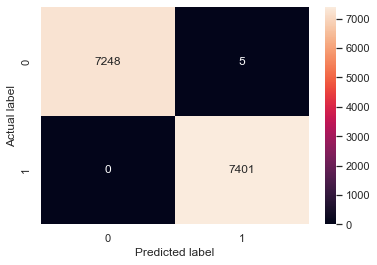

In [227]:
predicted=rf_new.predict(features_test)

print(f"Training Accuracy :{rf_new.score(features_train,target_train)}")
print(f"Testing Accuracy :{rf_new.score(features_test,target_test)}")
print(f"Validation Accuracy :{rf_new.score(features_val,target_val)}\n\n")
print(classification_report(target_test,predicted))

sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Cross Validation Score

In [228]:
from sklearn.model_selection import KFold,cross_val_score
models=[('Random Forest',RandomForestClassifier())]

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,features_selected,target_smot,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest 0.9997679814385151


In [229]:
import pickle
pickle.dump(rf_new,open("Startup's Acquisition Status.pkl",'wb'))